# Stellar Structures and the Standard Solar Model
### Joseph Livesey

## Question 2

In [27]:
import numpy as np
import pandas as pd
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as plt
from matplotlib import rc
np.seterr(divide='ignore', invalid='ignore')

plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

In [2]:
rho = 10 ** np.linspace(-1, 14, 1000)

bound_4 = 9.7e+8
bound_1 = 3.2e+6 * rho ** (1/3) / 0.5 ** (-1/3)
bound_2 = [1.2e+3 * r ** (2/3) * 0.5 for r in rho if r < bound_4]
bound_3 = [1.5e+6 * r ** (1/3) * 0.5 for r in rho if r > bound_4]

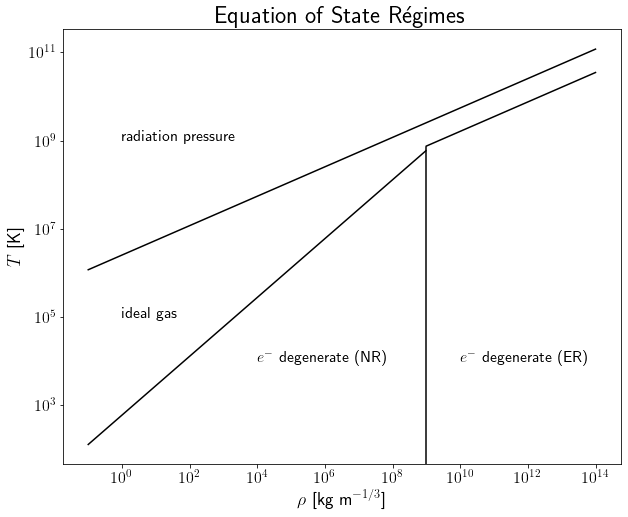

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(rho, bound_1, c='k')
ax.plot([r for r in rho if r < bound_4], bound_2, c='k')
ax.plot([r for r in rho if r > bound_4], bound_3, c='k')
ax.axvline(bound_4, 0, 0.73, c='k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title("Equation of State Régimes", fontsize=24)
ax.set_xlabel(r'$\rho$ [kg m$^{-1/3}$]', fontsize=18)
ax.set_ylabel(r'$T$ [K]', fontsize=18)
ax.text(1.0, 1e9, "radiation pressure", fontsize=16)
ax.text(1.0, 1e5, "ideal gas", fontsize=16)
ax.text(1e4, 1e4, r"$e^-$ degenerate (NR)", fontsize=16)
ax.text(1e10, 1e4, r"$e^-$ degenerate (ER)", fontsize=16)
ax.tick_params(labelsize=16);

# fig.savefig('eos_regions.pdf')
# fig.savefig('eos_regions.png')

## Question 3

In [39]:
# STANDARD SOLAR MODEL

df = pd.read_csv('bp2000_ssm.txt', sep=' ')

ssm_r   = df['R/Rsun']
ssm_rho = df['Rho']

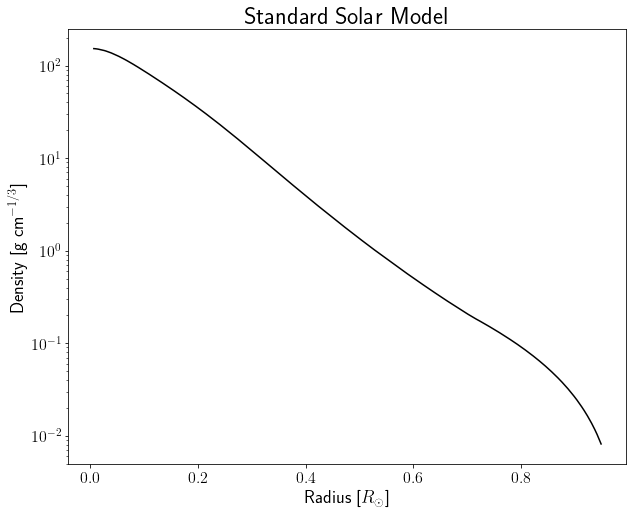

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
ax.plot(ssm_r, ssm_rho, 'k')
ax.set_title("Standard Solar Model", fontsize=24)
ax.set_xlabel(r"Radius [$R_\odot$]", fontsize=18)
ax.set_ylabel(r"Density [g cm$^{-1/3}$]", fontsize=18)
ax.set_yscale('log')
ax.tick_params(labelsize=16);

In [2]:
# SOLVING THE LANE-EMDEN EQUATION

def solveLaneEmden(n, log_delta_xi=-4):
    delta_xi = 10 ** log_delta_xi
    
    theta0 = 1.0
    phi0 = 0.0
    
    thetas  = [theta0]
    phis    = [phi0]
    xis     = [delta_xi]
    
    while True:
        theta  = thetas[-1]
        phi    = phis[-1]
        xi     = xis[-1]
        
        theta_i = theta - phi/(xi ** 2) * delta_xi
        phi_i   = phi + (xi ** 2) * (theta ** n) * delta_xi
        xi_i    = xi + delta_xi
        
        if theta_i < 1e-10:
            break
        
        thetas.append(theta_i)
        phis.append(phi_i)
        xis.append(xi_i)
    
    return xis, thetas

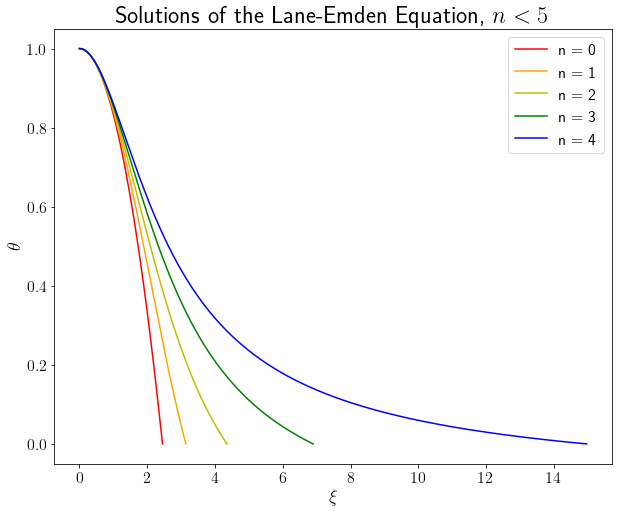

In [26]:
# xis, thetas = solveLaneEmden(n=0)

# fig, ax = plt.subplots(1, 1, figsize=(10,8))
# ax.plot(xis, thetas, 'g', label='L–E solution')
# ax.set_xlabel(r"$\xi$", fontsize=18)
# ax.set_ylabel(r"$\theta$", fontsize=18)
# ax.legend(loc=0, fontsize=16)
# ax.tick_params(labelsize=16);

fig, ax = plt.subplots(1, 1, figsize=(10,8))
colors = ['r', 'orange', 'y', 'g', 'b']
for n in range(5):
    xis, thetas = solveLaneEmden(n)
    ax.plot(xis, thetas, colors[n], label='n = '+str(n))
ax.set_title(r"Solutions of the Lane-Emden Equation, $n<5$", fontsize=24)
ax.set_xlabel(r"$\xi$", fontsize=18)
ax.set_ylabel(r"$\theta$", fontsize=18)
ax.legend(loc=0, fontsize=16)
ax.tick_params(labelsize=16);

# plt.savefig('L-E.png')

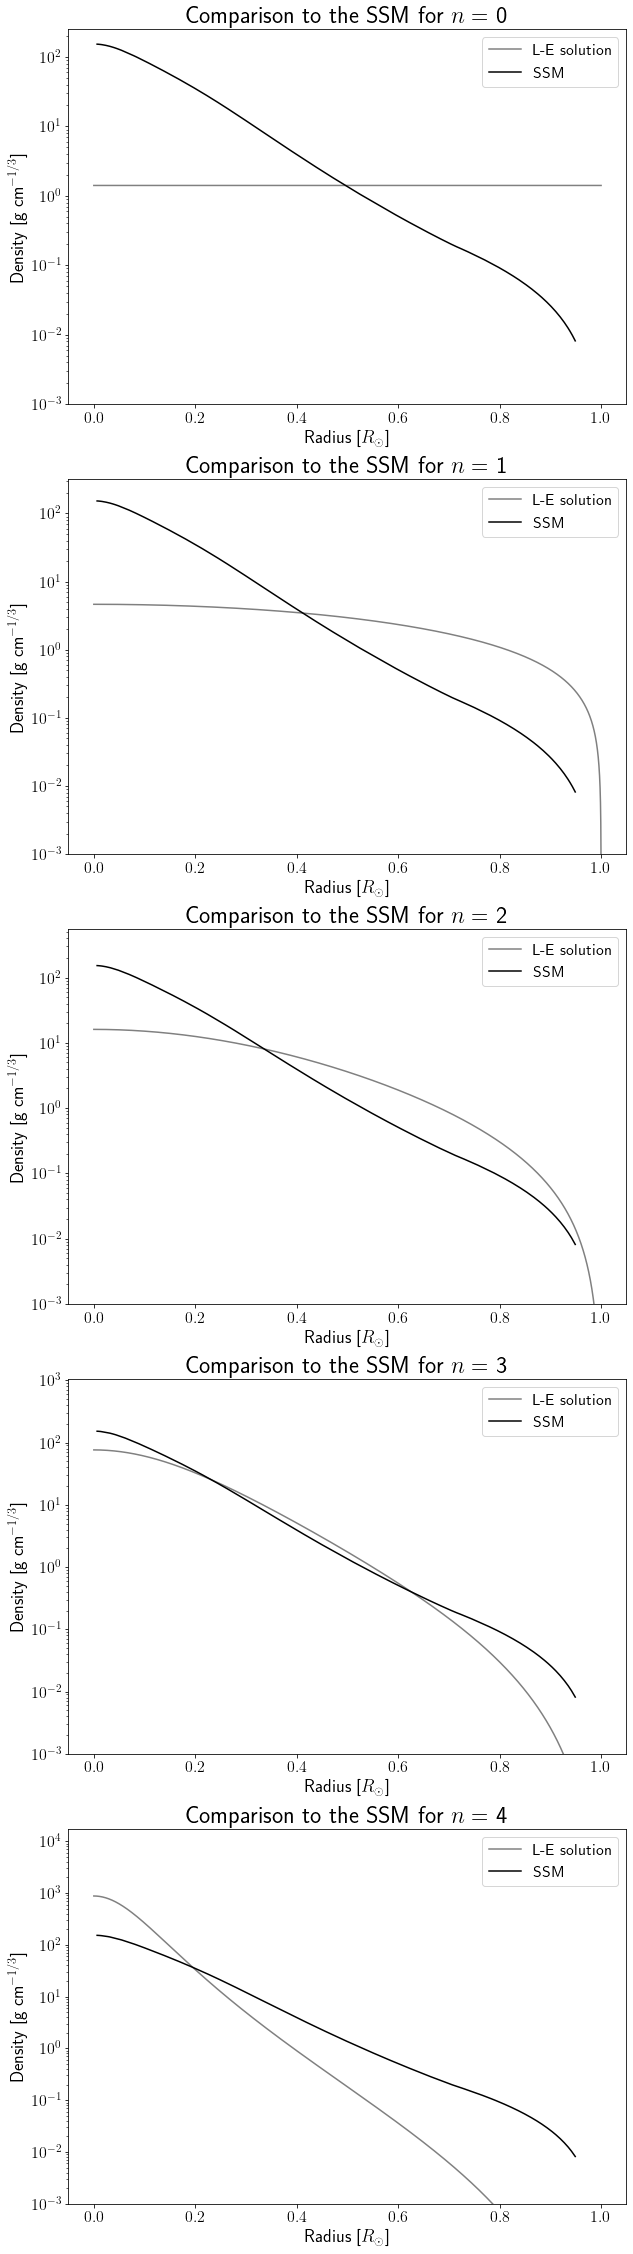

In [46]:
# COMPARISON OF THESE SOLUTIONS TO THE SSM

fig, ax = plt.subplots(5, 1, figsize=(10,40))
for n in range(5):
    xis, thetas = solveLaneEmden(n)
    
    xi_1     = xis[-1]
    dtheta_1 = (thetas[-1] - thetas[-2])/(xis[-1] - xis[-2])
    
    a     = const.R_sun / xi_1
    rho_c = 3 * const.M_sun / (12 * np.pi * const.R_sun ** 3) * xi_1 / np.abs(dtheta_1)
    
    rs   = [a * xi for xi in xis]
    rhos = [rho_c * theta ** n for theta in thetas]
    
    rs   = [r.to(u.solRad) / u.solRad for r in rs]
    rhos = [rho.to(u.g/u.cm**3) / (u.g/u.cm**3) for rho in rhos]
    
    ax = ax.ravel()
    ax[n].plot(rs, rhos, 'gray', label='L-E solution')
    ax[n].plot(ssm_r, ssm_rho, 'k', label='SSM')
    ax[n].set_title(r"Comparison to the SSM for $n =$ "+str(n), fontsize=24)
    ax[n].set_xlabel(r"Radius [$R_\odot$]", fontsize=18)
    ax[n].set_ylabel(r"Density [g cm$^{-1/3}$]", fontsize=18)
    ax[n].set_yscale('log')
    ax[n].set_ylim(10**-3)
    ax[n].legend(loc=0, fontsize=16)
    ax[n].tick_params(labelsize=16);
    
plt.savefig('SSM_comparison.png')

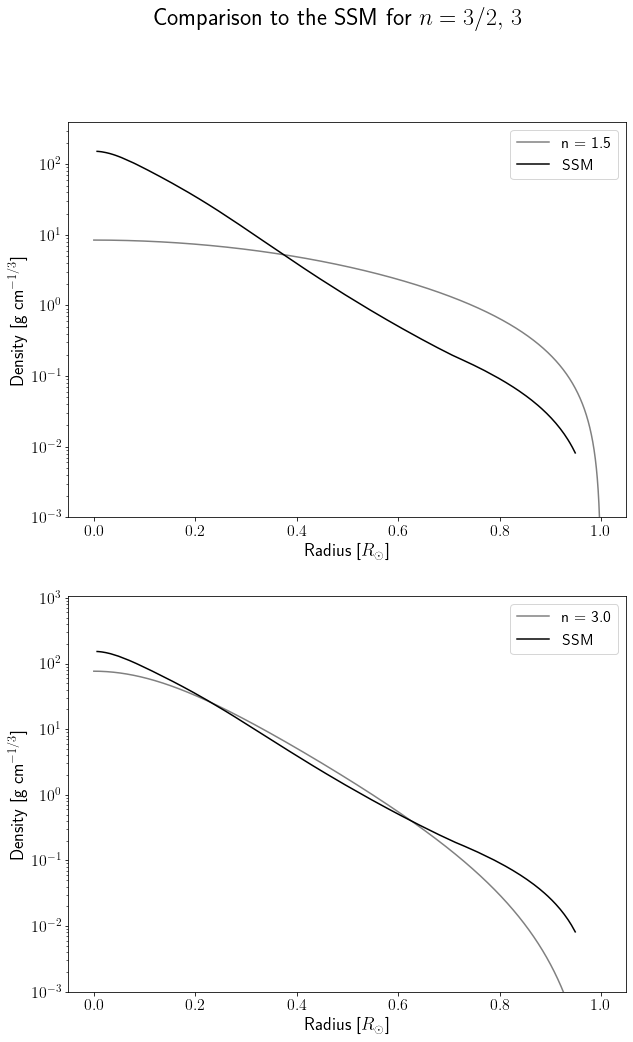

In [50]:
fig, ax = plt.subplots(2, 1, figsize=(10,16))
ns = [1.5, 3.0]
j  = 0
for n in ns:
    xis, thetas = solveLaneEmden(n)
    
    xi_1     = xis[-1]
    dtheta_1 = (thetas[-1] - thetas[-2])/(xis[-1] - xis[-2])
    
    a     = const.R_sun / xi_1
    rho_c = 3 * const.M_sun / (12 * np.pi * const.R_sun ** 3) * xi_1 / np.abs(dtheta_1)
    
    rs   = [a * xi for xi in xis]
    rhos = [rho_c * theta ** n for theta in thetas]
    
    rs   = [r.to(u.solRad) / u.solRad for r in rs]
    rhos = [rho.to(u.g/u.cm**3) / (u.g/u.cm**3) for rho in rhos]
    
    ax = ax.ravel()
    ax[j].plot(rs, rhos, 'gray', label='n = '+str(n))
    ax[j].plot(ssm_r, ssm_rho, 'k', label='SSM')
    ax[j].set_xlabel(r"Radius [$R_\odot$]", fontsize=18)
    ax[j].set_ylabel(r"Density [g cm$^{-1/3}$]", fontsize=18)
    ax[j].set_yscale('log')
    ax[j].set_ylim(10**-3)
    ax[j].legend(loc=0, fontsize=16)
    ax[j].tick_params(labelsize=16);
    j += 1

plt.suptitle(r"Comparison to the SSM for $n = 3/2,$ $3$", fontsize=24)
plt.savefig('SSM_comparison_2.png')